## Columns description

```
CRIM,  per capita crime rate by town
ZN,  proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS, proportion of non-retail business acres per town
CHAS,  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX, nitric oxides concentration (parts per 10 million)
RM,  average number of rooms per dwelling
AGE, proportion of owner-occupied units built prior to 1940
DIS, weighted distances to five Boston employment centres
RAD, index of accessibility to radial highways
TAX, full-value property-tax rate per $10,000
PTRATIO, pupil-teacher ratio by town
B, 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT, % lower status of the population
MEDV,  Median value of owner-occupied homes in $1000's
```

In [1]:
# import necessary packages

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Read the text file and preview 

with open('boston.txt') as f:
    data = f.read()

rows = data.split('\n')
print(len(rows))
rows[:5]

506


[' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00',
 ' 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60',
 ' 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70',
 ' 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40',
 ' 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20']

In [3]:
# Create a list of list

df_list = []
for row in rows:
    df_list.append([x.strip() for x in row.split()])
print(len(df_list))

506


In [4]:
# columns for DataFrame

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
# Create DataFrame using the columns and the list of list

df = pd.DataFrame(df_list, columns=columns)

In [6]:
# preview

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


In [7]:
# Convert all columns to float

df = df.astype(float)

In [8]:
# Convert these two columns to int

df['CHAS'] = df['CHAS'].astype(int)
df['RAD'] = df['RAD'].astype(int)

In [9]:
# NA values

print('Per column Nan Count\n', df.isna().sum())

Per column Nan Count
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [10]:
# null values

print('Per column NULL Count\n', df.isnull().sum())

Per column NULL Count
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [11]:
# Stats

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# Column wise data types

df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [13]:
# Unique values per column

df.apply(lambda x: len(x.unique()))

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [14]:
# All values or column RAD

df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [15]:
# Drop UnImportant column

df = df.drop(columns=['INDUS'])

In [16]:
# Preview

df.head()

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
# Convert categorical columns to one hot encoding 

df = pd.get_dummies(df, columns=['CHAS', 'RAD'])

In [18]:
df.columns

Index(['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT',
       'MEDV', 'CHAS_0', 'CHAS_1', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5',
       'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24'],
      dtype='object')

In [19]:
# target column

y = df['MEDV']

X = df.drop(columns=['MEDV'])

In [20]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Implementing Linear Regression

reg = LinearRegression()

reg.fit(X_train, y_train)

# R2 Error for train data
reg.score(X_train, y_train)

0.7535894816534173

In [22]:
# R2 Score  for test data
reg.score(X_test, y_test)

0.7169940357080478

In [23]:
# Prediction

y_pred = reg.predict(X_test)

In [24]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_df.head()

,Actual,Predicted
173,23.6,28.989295
274,32.4,35.946598
491,13.6,16.525345
72,22.8,24.791225
452,16.1,18.788806


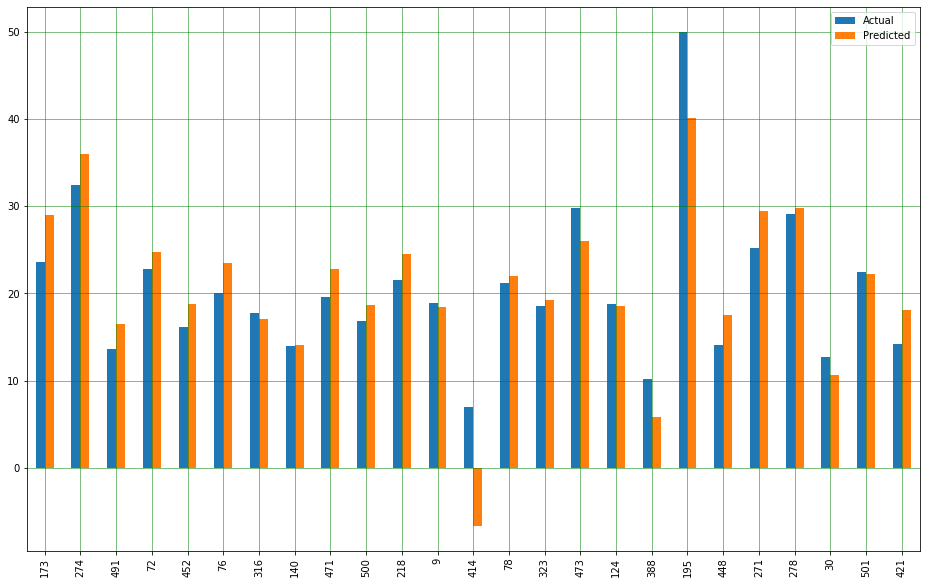

In [25]:
# Visualing actual and predicted accuracies  

plot_df = result_df.head(25)
plot_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()